# Support Vector Machines

## 1. Social Network Ads

En primer lugar vamos a trabajar con el dataset de Social Networks Ads, un conjunto de datos que permiten determinar si un usuario compró o no un producto en particular. Tanto el dataset como su descripción los pueden encontrar en [Kaggle](https://www.kaggle.com/rakeshrau/social-network-ads).

### Columnas del dataset:
* User ID: identificación de usuario.
* Gender: género.
* Age: edad.
* EstimatedSalary: salario estimado.
* Purchased: compró/no compró un producto en particular.

Ahora sí, a trabajar. En primer lugar, recomendamos hacer una pequeña exploración de datos si tienes tiempo. Luego, sigue los pasos que aquí te dejamos. Si te sientes seguro/a, hasta puedes intentar implementar un SVM sobre ese dataset sin mirar la guía que dejamos. En ese caso, te conviene hacerlo en otro notebook. ¡Inténtalo!

In [1]:
!pip install mglearn

In [2]:
import mglearn
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
from utilities.evaluation import ModelEvaluation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

2. Sólo vamos a utilizar como features las columnas `Age` y `EstimatedSalary` (así podemos visualizar). Y como target a la columna `Purchased`

In [3]:
social = pd.read_csv('../data/Social_Network_Ads.csv', dtype={'User ID': object})
social.sample(n=4)

,User ID,Gender,Age,EstimatedSalary,Purchased
369,15624755,Female,54,26000,1
327,15785170,Female,42,75000,0
347,15768151,Female,54,108000,1
283,15663249,Female,52,21000,1


In [4]:
social.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    object
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 15.8+ KB


In [5]:
social.describe(exclude='number')

,User ID,Gender
count,400,400
unique,400,2
top,15724402,Female
freq,1,204


In [6]:
social.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


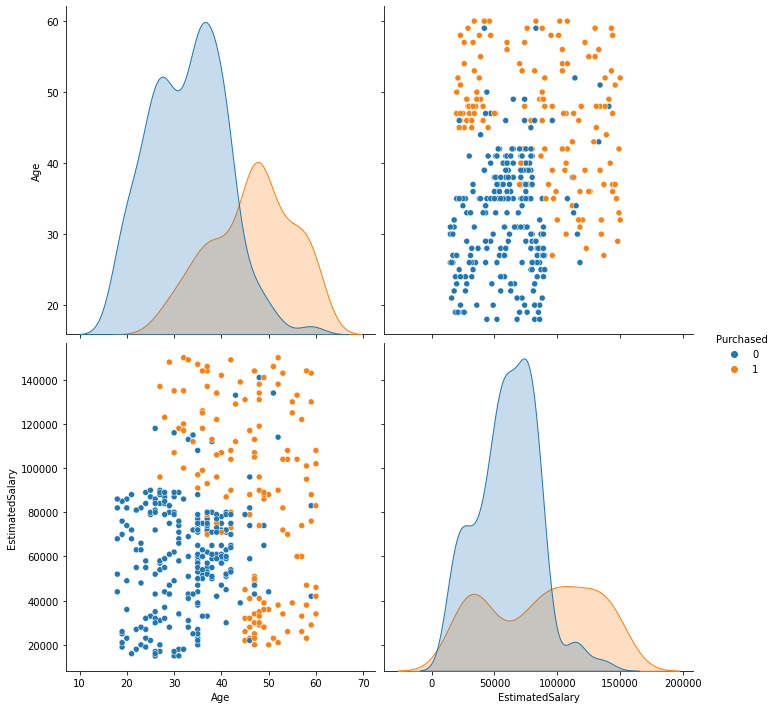

In [7]:
sns.pairplot(data=social[['Age', 'EstimatedSalary', 'Purchased']], hue='Purchased', height=5)

In [8]:
social['Purchased'].value_counts(normalize=True)

0    0.6425
1    0.3575
Name: Purchased, dtype: float64

3. Separa los datos de entrenamiento de los datos de prueba.

In [9]:
purchased = social.pop('Purchased')
X = social.loc[:, ['Age', 'EstimatedSalary']]

train_data, test_data, train_label, test_label = train_test_split(X, purchased,
                                                                  test_size=0.3,
                                                                  stratify=purchased, random_state=42)

print(f'El set de entrenamiento tiene {train_data.shape[0]} observaciones, y {train_data.shape[1]} variables')
print(f'El set de prueba tiene {test_data.shape[0]} observaciones, y {test_data.shape[1]} variables')

El set de entrenamiento tiene 280 observaciones, y 2 variables
El set de prueba tiene 120 observaciones, y 2 variables


4. Estandariza los datos (`StandardScaler`).
5. Entrena un SVM. Para ello, utiliza la clase `SVC` de la librería Scikit-Learn cuya documentación la puedes encontrar [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).

In [10]:
scaler = StandardScaler()

train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

In [11]:
svm = SVC(kernel='rbf', random_state=42)

svm.fit(train_data, train_label)

SVC(random_state=42)

6. Realiza las predicciones sobre los datos de prueba.

In [12]:
predictions = svm.predict(test_data)
evaluation = ModelEvaluation(observed=test_label, predicted=predictions)

7. Visualiza los resultados mediante:

* Matriz de confusión (`confusion_matrix`)
* Reporte de clasificación (`classification_report`)
* Gráfico de fronteras de decisión (¡Busca en notebooks anteriores!)

In [13]:
evaluation.generate_report()

,precision,recall,f1-score,support
0,0.95,0.92,0.93,77.00
1,0.87,0.91,0.89,43.00
accuracy,0.92,0.92,0.92,0.92
macro avg,0.91,0.91,0.91,120.00
weighted avg,0.92,0.92,0.92,120.00


In [14]:
evaluation.calculate_metrics()
evaluation.print_metrics()
evaluation.confusion_matrix(normalize=True)

El AUC es: 0.91
El accuracy es: 0.92
La precision es: 0.92
El recall es: 0.92
El F1 Score es: 0.92 



Predicted,0,1
Observed,,
0,0.92,0.08
1,0.09,0.91


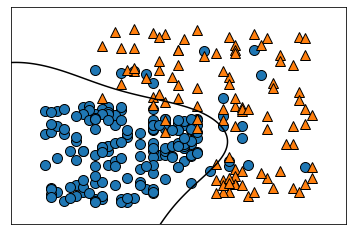

In [15]:
mglearn.plots.plot_2d_separator(classifier=svm, X=train_data)
mglearn.discrete_scatter(x1=train_data[:, 0], x2=train_data[:, 1], y=train_label)

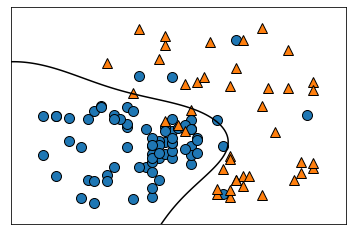

In [16]:
mglearn.plots.plot_2d_separator(classifier=svm, X=test_data)
mglearn.discrete_scatter(x1=test_data[:, 0], x2=test_data[:, 1], y=test_label)